In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [7]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [11]:
clf.predict([[3, 3, 5, 2]])[0]

2

In [12]:
# Finding Important Features in Scikit-learn
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.455626
petal width (cm)     0.444923
sepal length (cm)    0.077104
sepal width (cm)     0.022346
dtype: float64

In [13]:
type(feature_imp)

pandas.core.series.Series

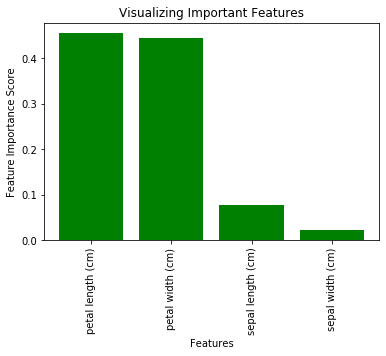

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Creating a bar plot
plt.bar(feature_imp.index, feature_imp, color="g")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation= 'vertical')
plt.show()

In [15]:
# Split dataset into features and labels
X=data[['petal length', 'petal width']]  # Removed feature "sepal length" và "sepal width"
y=data['species']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [17]:
# petal length = 5, petal width = 2 => predict
clf.predict([[5, 2]])[0]

2

#### Cross Validation

In [20]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,
                                                            y,
                                                            test_size=0.2) # 80% training and 20% test

In [21]:
# Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train_1,y_train_1)

# prediction on test set
y_pred_1=clf1.predict(X_test_1)

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

Accuracy: 0.9


In [23]:
# petal length = 5, petal width = 2 => loại hoa gì?
clf1.predict([[5, 2]])

array([2])

#### k-folds

In [24]:
X.head(10)

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [26]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
from sklearn.model_selection import KFold

In [29]:
scores = []
models = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index.tolist(), "\n")
#     print("Test Index: ", test_index.tolist())    
    X_train, X_test, y_train, y_test = X.iloc[train_index.tolist()], X.iloc[test_index.tolist()], y[train_index.tolist()], y[test_index.tolist()]
    
    clf_t=RandomForestClassifier(n_estimators=100)
    clf_t.fit(X_train, y_train)
    scores.append(clf_t.score(X_test, y_test))
    models.append(clf_t)

In [30]:
scores

[1.0,
 1.0,
 1.0,
 1.0,
 0.9333333333333333,
 0.8666666666666667,
 1.0,
 0.8666666666666667,
 0.8,
 1.0]

In [31]:
avg_scores = sum(scores)/len(scores)
avg_scores

0.9466666666666669

In [32]:
max_scores = max(scores)
max_scores

1.0

In [34]:
p = -1
for i in range(0, len(scores)):
    if scores[i] == max_scores:
        p = i
        #break

In [35]:
p

9

In [36]:
best_model = models[p]
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
best_model.predict([[5, 2]])[0]

2

In [40]:
from sklearn import model_selection
clf_k=RandomForestClassifier(n_estimators=100)
kfold = KFold(n_splits=10, random_state=42, shuffle=False)
results = model_selection.cross_val_score(clf_k, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.333% (10.328%)


In [41]:
results

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.66666667, 1.        ])